NMS TF

In [1]:
import numpy as np
import tensorflow as tf

C:\Users\Royce\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

In [3]:
# tensorflow1.9.0版本之后才支持score_threshold参数
def nms_tf(bboxes, scores, max_output_size, iou_threshold=0.5, name=None): 
    # 非极大抑制：直接采用tf.image.non_max_suppression()函数实现即可
    # 转tensor
    bboxes = tf.convert_to_tensor(bboxes, dtype=tf.float32)
    # nms
    indices = tf.image.non_max_suppression(bboxes, scores, max_output_size, iou_threshold, name)
    # tf.image.non_max_suppression()方法返回的是bboxes对应的下标，直接用tf.gather()方法得到对应的bboxes与scores
    bboxes_out = tf.gather(bboxes, indices)
    scores_out = tf.gather(scores, indices)
    return bboxes_out, scores_out

In [4]:
bboxes = np.array([[78,22,253,304],[269,19,360,296],[50,30,200,280],[280,10,370,320]])
scores = tf.constant([0.9,0.8,0.7,0.75])
max_output_size = 10
bboxes_out, scores_out = nms_tf(bboxes, scores, max_output_size, iou_threshold=0.5, name=None)
print(sess.run(bboxes_out))
print(sess.run(scores_out))

[[ 78.  22. 253. 304.]
 [269.  19. 360. 296.]]
[0.9 0.8]


NMS的图片实际应用

In [8]:
# 实际图片的可视化样例
import cv2
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
image_path = r'C:\Users\Royce\Desktop\time.jpg'
input_np = io.imread(image_path)
print(input_np.shape)
input_tf = tf.convert_to_tensor(input_np, dtype=tf.float16)

(326, 550, 3)


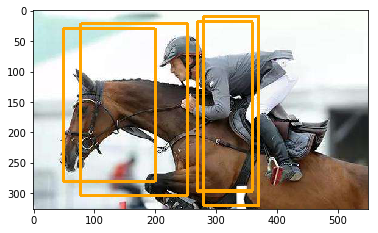

In [9]:
# 先可视化预定义的几个bboxes框
for a in bboxes:
    x1,y1,x2,y2 = a
    bbox = cv2.rectangle(input_np,(x1,y1),(x2,y2),(255, 165, 0),3)
plt.imshow(bbox)

第1个bbox的score为：0.8999999761581421
第2个bbox的score为：0.800000011920929


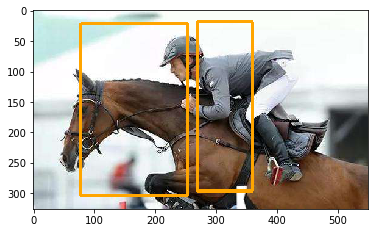

In [12]:
# 接下来使用非极大抑制保留剩下的bboxes
input_np = io.imread(image_path)
bboxes_out, scores_out = nms_tf(bboxes, scores, max_output_size, iou_threshold=0.5, name=None)
bboxes_out_np = bboxes_out.eval(session=sess)
scores_out_np = scores_out.eval(session=sess)
for i,bbox in enumerate(bboxes_out_np):
    x1,y1,x2,y2 = bbox
    output_np = cv2.rectangle(input_np, (x1,y1), (x2,y2), (255, 165, 0),3)
    print("第{}个bbox的score为：{}".format(i+1, scores_out_np[i]))
plt.imshow(output_np)